In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [13]:
D = 10

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=3)#, max_evals=1000)
opt

Optimization(population=Population(n=20, dimension=10), get_fitness=<function fitness_func at 0x7fd45bcc5b70>, get_constraints=[<function constraint_func at 0x7fd45bcc5bf8>], constraint_params=[3], max_times=None, frequency=None, CR=0.3, beta_min=0.2, beta_max=0.8, max_evals=None, metrics=('fitness',), callbacks=[<denn.callbacks.Recorder object at 0x7fd45bad7d30>])

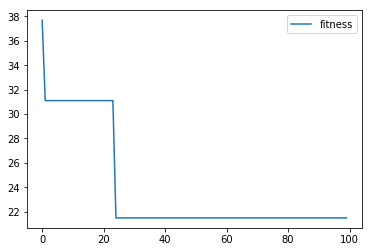

In [14]:
opt.run()

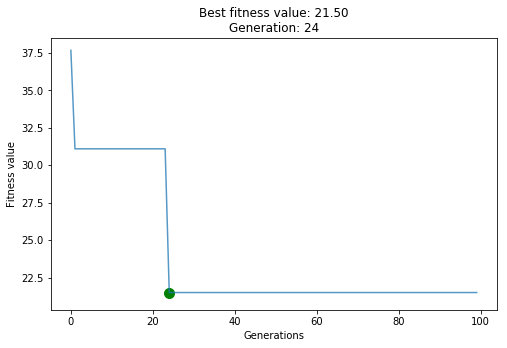

In [15]:
opt.recorder.plot()

In [17]:
opt.state_dict

{'gen': 100,
 'evals': 2020,
 'time': 0,
 'best': Individual(dimensions=10, lower_limit=-5, upper_limit=5, idx=10, gen=99, fitness_value=21.499269456917087, constraints=[-3.9143725293824585], constraints_sum=0.0, is_feasible=True),
 'run_gens': 100,
 'gen_end': 99,
 'pbar': <fastprogress.fastprogress.NBMasterBar at 0x7fd45bb67c18>,
 'metrics': ('fitness',),
 'max_evals': None,
 'max_times': None,
 'frequency': None,
 'show_graph': True,
 'update_each': 10,
 'is_final_gen': True,
 'last_indiv': Individual(dimensions=10, lower_limit=-5, upper_limit=5, idx=19, gen=99, fitness_value=52.54561576123998, constraints=[-1.6501785396426836], constraints_sum=0.0, is_feasible=True),
 'last_fitness': 117.10532555100542,
 'last_constraint_param': 3,
 'last_each_constraint': -5.963667193969208,
 'last_constraints': [-5.963667193969208],
 'indiv_bkup': Individual(dimensions=10, lower_limit=-5, upper_limit=5, idx=19, gen=99, fitness_value=52.54561576123998, constraints=[-1.6501785396426836], constraint